Data Analysis Expressions (DAX) is a programming language used throughout Microsoft Power BI to create calculated columns, measures, and custom tables. It's a collection of functions, operators, and constants that we can use in a formula, or expression, to calculate and return one or more values. We can use DAX to solve a number of calculation and data analysis problems, which can help us create new information from data that is already in our model.

In Power BI, we can use different calculation techniques and functions to create measures or calculated columns. Primarily, we can get the same result by using these techniques; however, the key is to know how and when to apply them. With a basic understanding of when and how to use which technique, we can create robust, high-performing data models. By the end of this file, we'll be able to do the following:

* Build quick measures
* Create calculated columns
* Use DAX to build measures
* Discover how context affects DAX measures
* Use the **CALCULATE** function to manipulate filters
* Implement time intelligence by using DAX

DAX allows us to augment the data that we bring in from different data sources by creating a calculated column that didn't originally exist in the data source.

For example, assume that we are importing data from a database that contains sales transactions. Each individual sales transaction has the following columns: `Order ID`, `Product ID`, `Quantity`, and `Unit Price`. Notice that a column doesn't exist for the total sales amount for each order.

**Note:** This file is not about data visualization, but it does show data visualization to demonstrate how DAX works.

The following figure shows how the initial shape of the data appears in a Power BI table visual.

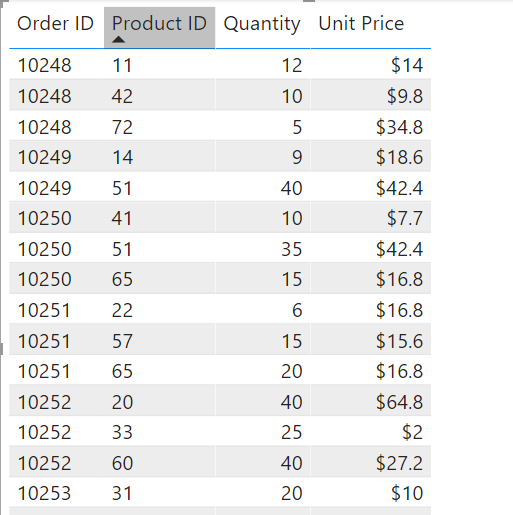

We can start using DAX by creating a calculated column that multiplies the unit price with the quantity. The calculated column will create a value for each row called `Total Price`. Create the new column by selecting the ellipsis (...) button on the table in the **Fields** list and then selecting New column.

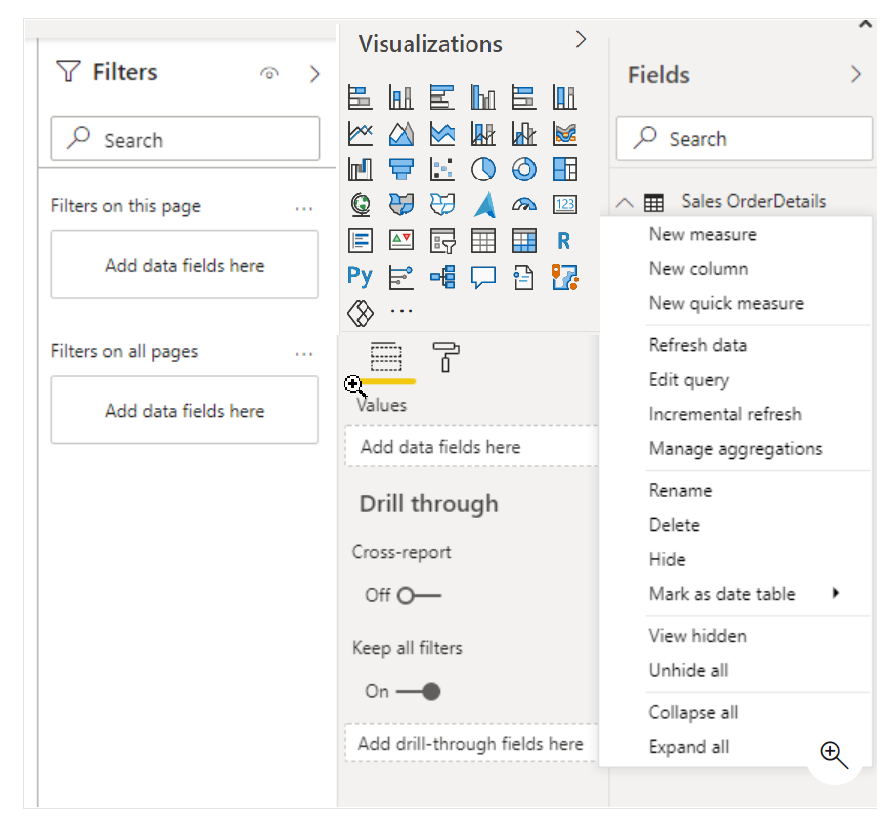

A new DAX formula appears in the formula bar underneath the ribbon at the top.

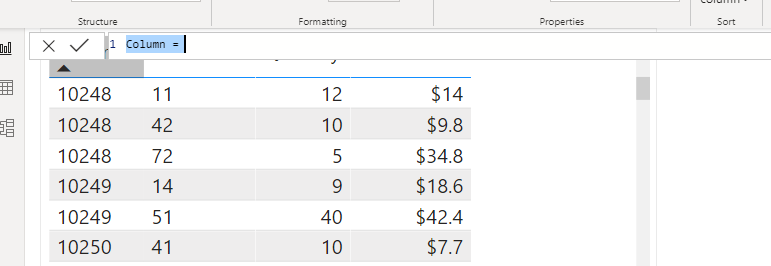

We can replace the `Column =` default text with the following example text:

`Total Price = 'Sales OrderDetails'[Quantity] * 'Sales OrderDetails'[Unit Price]`

The value on the left side of the equal sign is the column name. The text on the right side of the equal sign is the DAX expression. This simple DAX expression takes the quantity value and multiplies it with the unit price value for each individual row. It will produce one value for each record in the table. If we drag the new column from the **Fields** list to the visual, we will see the new values.

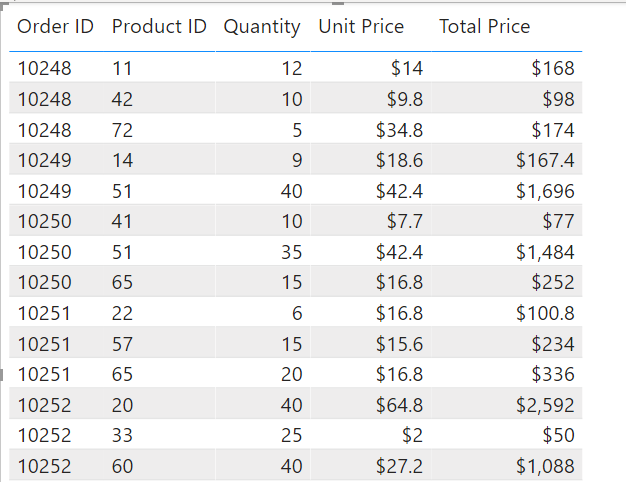

The previous screenshot shows that DAX is calculating correctly and displaying the results that we wanted.

Calculated columns are materialized in the `.pbix` Power BI file extension, meaning that each time we add a calculated column, we are increasing the size of the overall file. Having too many calculated columns will slow performance and will cause us to reach the maximum Power BI file size sooner.

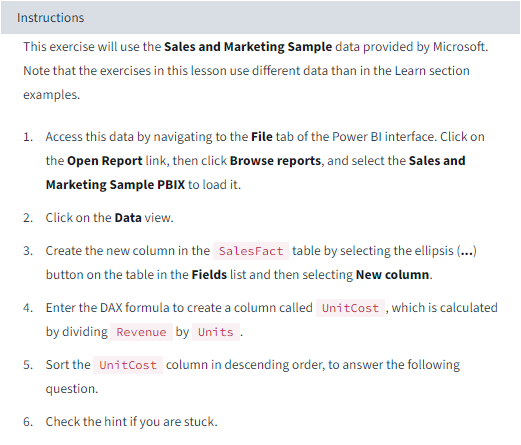

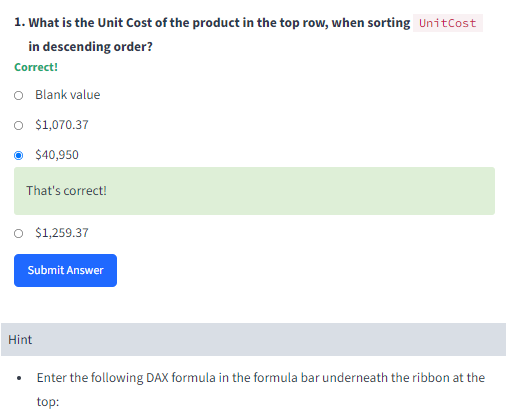

There are three ways to create a custom column in Power BI:

* Create the column in the source query when you get the data — for example, by adding the calculation to a view in a relational database.
* Create a custom column in Power Query.
* Create a calculated column by using DAX in Power BI.

We can create a calculated column when we pull the data from the data source. Each data source would have a different technique for completing this action. For instance, if we were pulling data from a relational data source by using a view that was written in SQL, it would look like the following:

`CREATE VIEW OrdersWithTotalPrice AS
SELECT unitprice, qty, unitprice * qty AS TotalPrice
  FROM sales.salesorders`

Using SQL is an efficient way of creating a column because it makes the data source do the calculations for us. In Power BI, the calculated column would appear like any other column.

We can also use Power Query to create a custom column.

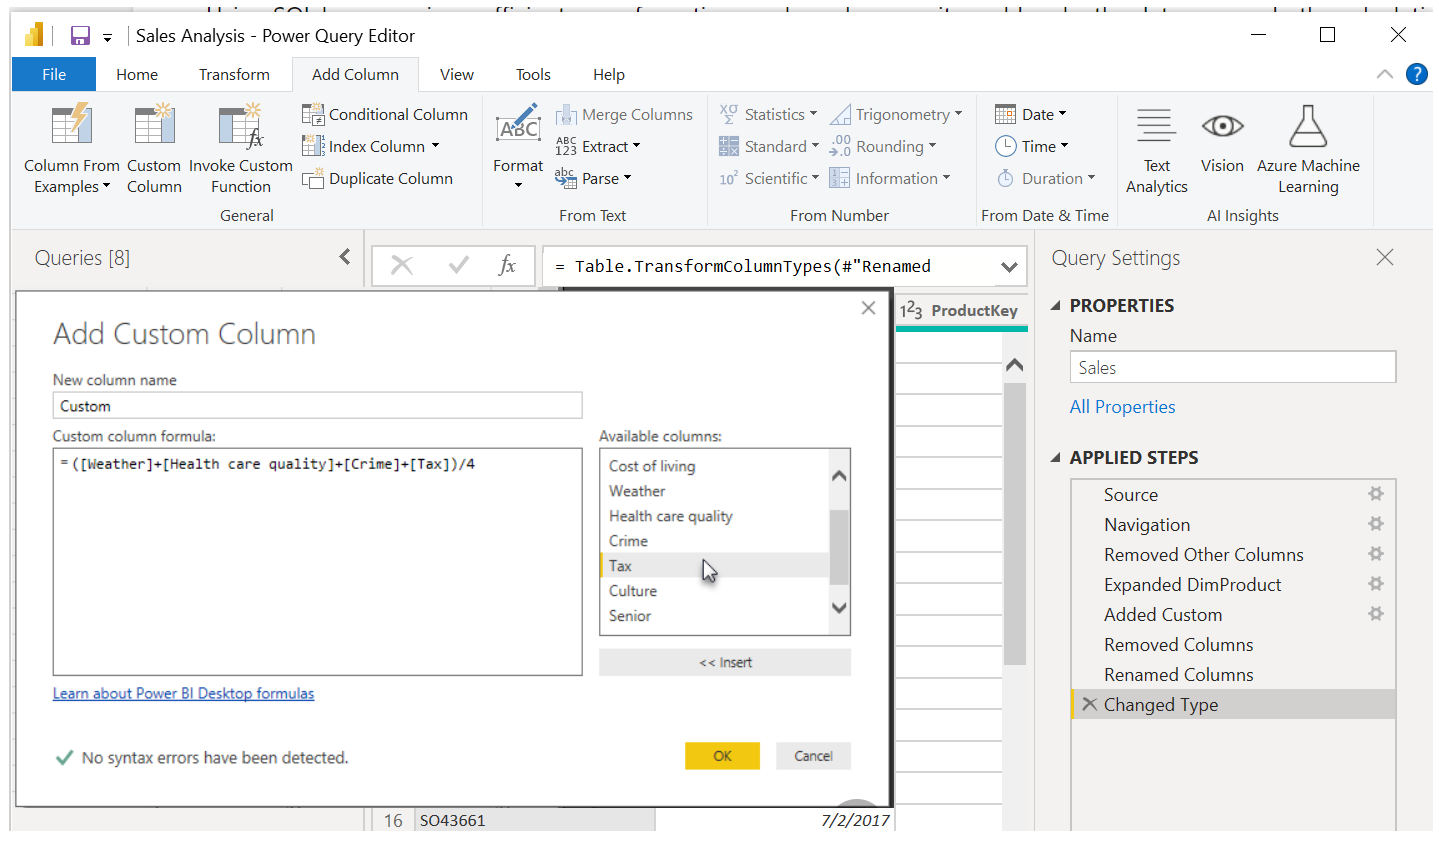

The custom column dialog uses the **M language** to create the new column. (M language is beyond the scope of this file.)

The third way to create a calculated column is by using DAX in Power BI, as previously demonstrated.

When we create a calculated column by using DAX, we don't need to refresh the dataset to see the new column. In the other methods, we would need a refresh to see changes. This process can be lengthy if we're working with a lot of data. However, this issue is irrelevant because after columns have been created they are rarely changed.

The DAX calculated column doesn't compress as well as the other methods. The other column types do get compressed, which makes the `.pbix` file smaller and the performance usually faster.

Generally, the earlier we can create a column, the better. It isn't considered an optimal practice to use DAX for calculations if you can use a different mechanism.

In addition, one way to avoid using a calculated column is to use one of the `X` functions, such as `SUMX`, `COUNTX`, `MINX`, and so on. (The `X` functions are also beyond the scope of this file; however, they allow us to create measures that are aware of the data in individual rows and calculate totals based on the totals in the row. These functions are called iterator functions because, though they are used in measures, they iterate over the individual rows to do their calculations. An `X` function will perform better and use less disk space than a calculated column. For more information about `X` functions, see the Microsoft documentation.)

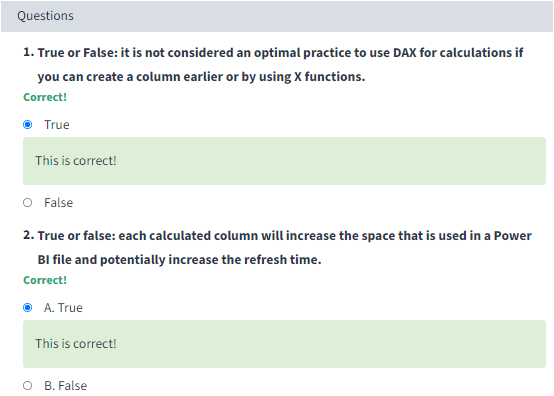

**Use measures**

Calculated columns are useful when we need to operate row by row. However, other situations might require a simpler method. For example, consider a situation wherein we want an aggregation that operates over the entire dataset, and we want the total sales of all rows. Furthermore, we want to slice and dice that data by other criteria like total sales by year, by employee, or by product.

To accomplish those tasks, we would use a measure. We can build a measure without writing DAX code; Power BI will write it for us when we create a quick measure.

There are many available categories of calculations and ways to modify each calculation. Another advantage is that we can see the DAX that's implemented by the quick measure while jumpstarting or expanding our own DAX knowledge.

**Create a quick measure**

To create a quick measure in Power BI Desktop, right-click or select the ellipsis (...) button next to any item in the **Fields** pane, and then select **New Quick Measure** from the menu that appears. The Quick measures screen will appear.

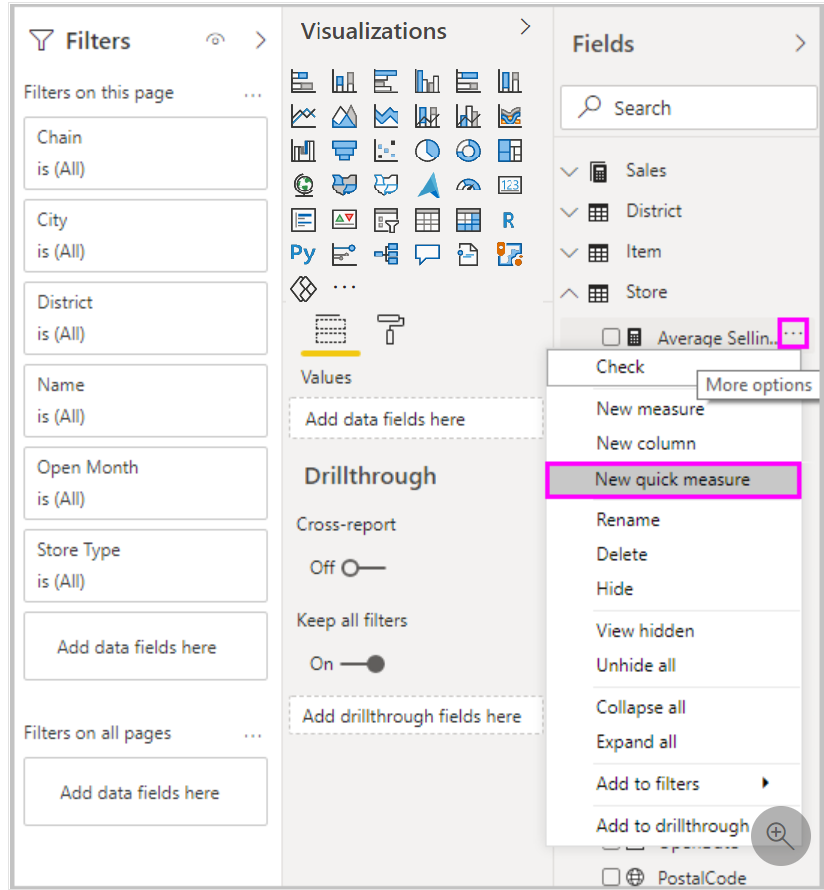

In the Quick measures window, we can select the calculation that we want and the fields to run the calculation against. For instance, we can select a calculation and the column that we want to operate over. Power BI creates the DAX measure for us and displays the DAX. This approach can be a helpful way to learn the DAX syntax.

For more information, see the [Use quick measures for common calculations documentation](https://docs.microsoft.com/en-us/power-bi/transform-model/desktop-quick-measures).

**Create a measure**

Measures are used in some of the most common data analyses.

To continue with the previous scenario: we want to create a measure that totals our new column for the entire dataset. Similar to how we created a calculated column, we can go to the **Fields** list, click the three-dot ellipsis on the selected field, and select **New Measure**.

Text will now appear in the formula bar underneath the ribbon.

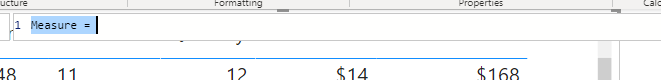

We can replace the `Measure =` text with the following text: 

`Total Sales = SUM('Sales OrderDetails'[Total Price])` 

The new measure will now appear in the **Fields** list.

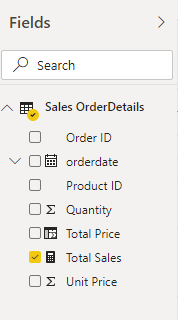

When we drag `Total Sales` over to the report design surface, we will see the total sales for the entire organization in a column chart.

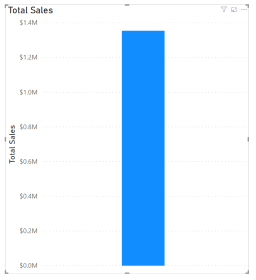

**Differences between a calculated column and a measure**

The fundamental difference between a calculated column and a measure is that a calculated column creates a value for each row in a table. For example, if the table has 1,000 rows, it will have 1,000 values in the calculated column. Calculated column values are stored in the Power BI `.pbix` file. Each calculated column will increase the space that is used in that file and potentially increase the refresh time.

Measures are calculated on demand. Power BI calculates the correct value when the user requests it. When we previously dragged the Total Sales measure onto the report, Power BI calculated the correct total and displayed the visual. Measures don't add to the overall disk space of the Power BI `.pbix` file.

Measures are calculated based on the filters selected by the report user. The combination of filters used defines the filter context.

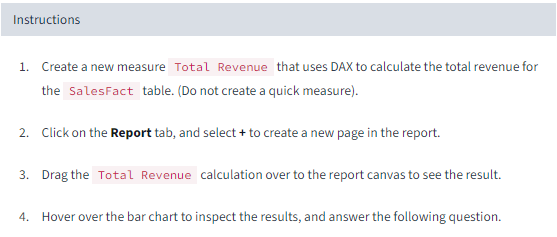

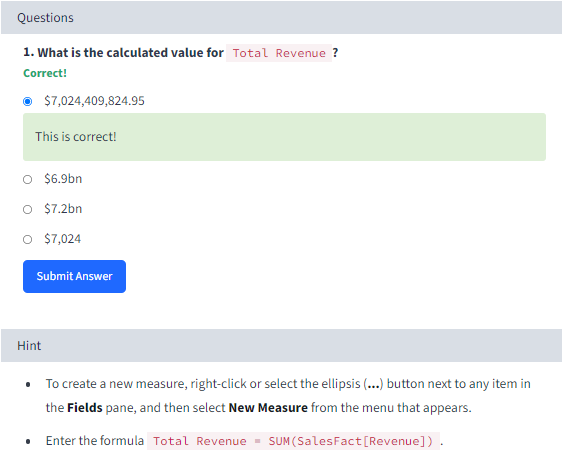

How context affects DAX measures is a difficult concept to comprehend. The ensuing visuals will demonstrate how context affects DAX measures so you can see how they interact together.

The following three visuals use the exact same DAX measure: Total Sales.

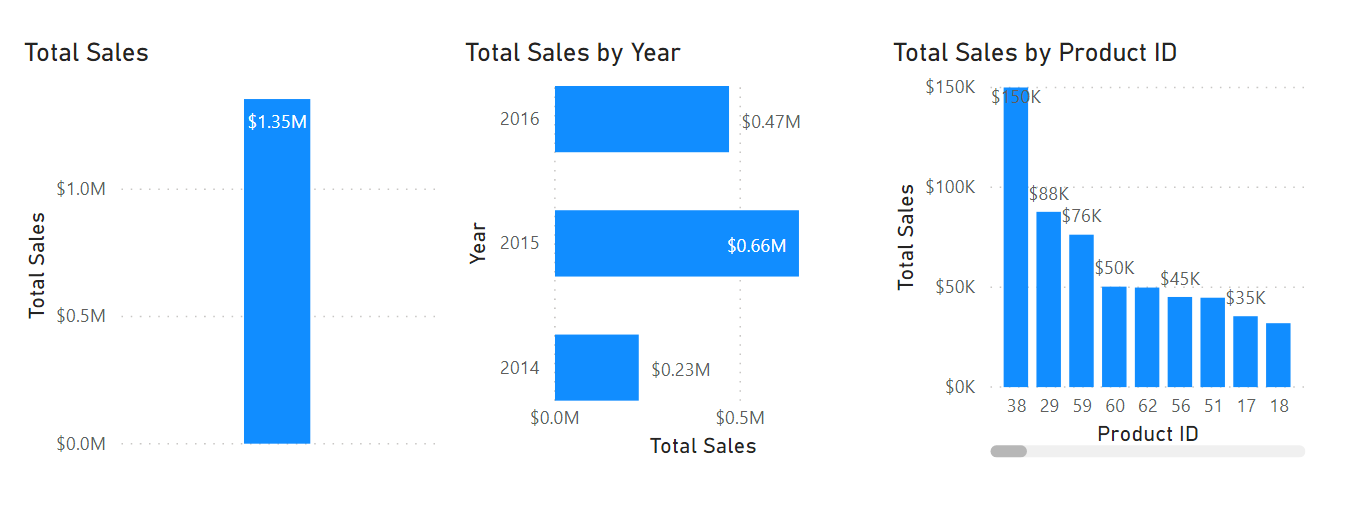

Though each visual uses the same DAX measure and, therefore, the same DAX formula, the visuals produce different results. For instance, the first visual shows the Total Sales measure for the entire dataset. In this dataset, Total Sales is USD1.35 million. In the second visual, Total Sales is broken down by year. For instance, in 2014, Total Sales is USD0.23 million. In the third visual, Total Sales is broken down by Product ID.

With Power BI, even though the measure was only defined once, it can be used in these visuals in different ways. Each of the totals is accurate and performs quickly. It's the context of how the DAX measure is used that calculates these totals accurately.

Interactions between visuals will also change how the DAX measure is calculated. For instance, if we select the second visual and then select 2015, the results appear as shown in the following screenshot.

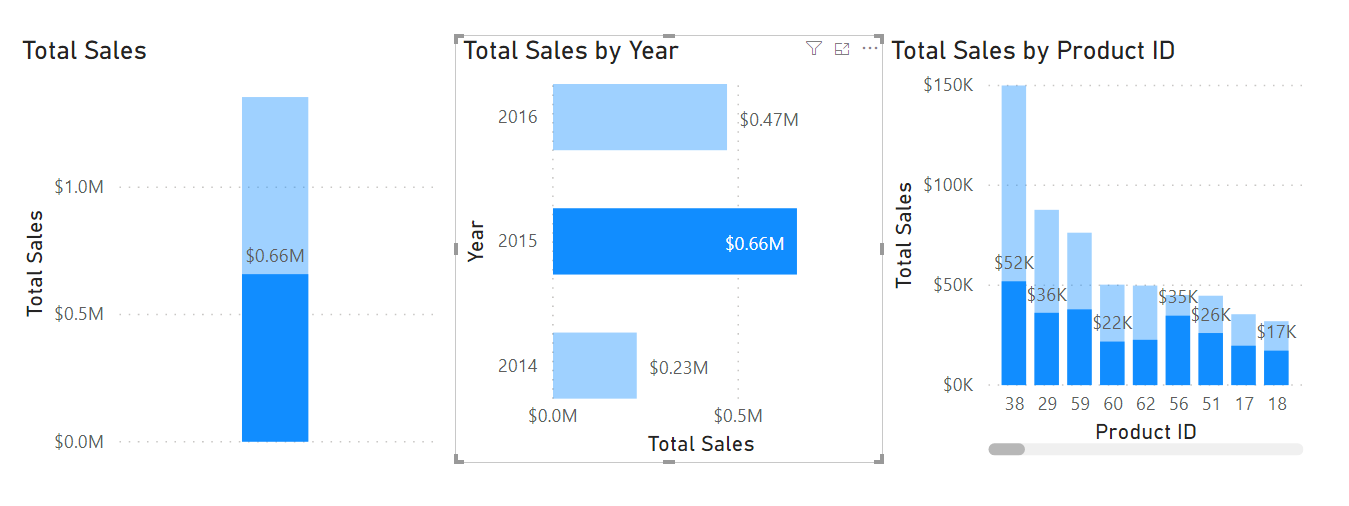

Selecting 2015 in the second visual changed the filter context for the DAX measure. It modified the first visual to equal the sales for 2015: USD0.66 million. It also broke down the Total Sales By Product ID but only shows the results for 2015. Those calculations quickly changed in memory and displayed the results in a highly interactive manner to the user.

The definition of the DAX measure hasn't changed; it's still the original, as shown in the following example:

`Total Sales = SUM('Sales OrderDetails'[Total Price])`

This scenario is a simple way to explain how context works with DAX. Many other factors affect how DAX formulas are evaluated. Slicers, page filters, and more can affect how a DAX formula is calculated and displayed.

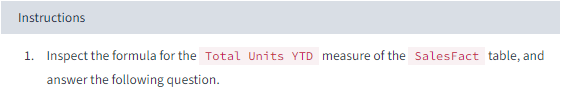

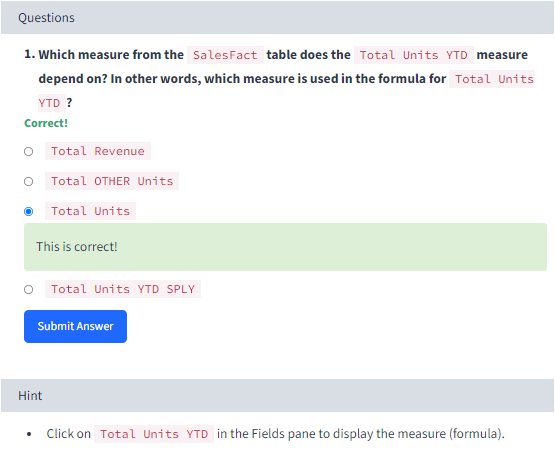

The `CALCULATE` function in DAX is one of the most important functions that a data analyst can learn. The function name doesn't adequately describe all it's intended to do.

The `CALCULATE` function is our method of creating a DAX measure that will override certain portions of the context that are being used to express the correct result.

For instance, if we want to create a measure that always calculates the total sales for 2015, regardless of which year is selected in any other visual in Power BI, we would create a measure that looks like the following sample:

`Total Sales for 2015 = 
 CALCULATE(
   SUM('Sales OrderDetails'[Total Price]), 
   YEAR('Sales OrderDetails'[orderdate]) = 2015
 )`

Notice how the measure is named `Total Sales for 2015`. When we use the `CALCULATE` function to override the context, it's helpful to name the measure in a way that describes exactly how we're overriding it. In this example, `CALCULATE` is aggregating the `Total Price` column, just as we did in the previous measure. However, instead of operating over the entire dataset while using whatever the filter context tells it to do, we are overriding the filter context for the year 2015. No matter what year is selected as a filter for other reports, we will always get the total for 2015 using this measure; all other filters still apply. The subsequent example shows this concept in action.

When both measures are added to the previous visual they will resemble the following screenshot.

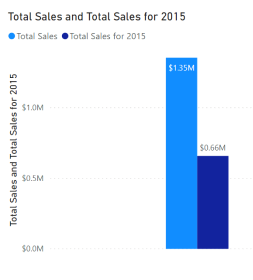

As we saw in the preceding screenshot, Total Sales is still USD1.35 million, while the 2015 Total Sales is USD0.66 million.

When we add the other visual onto the report, as we did previously, and then select 2015, the results will look like the following image. If we select 2016, Total Sales for 2015 will remain at USD0.66 million.

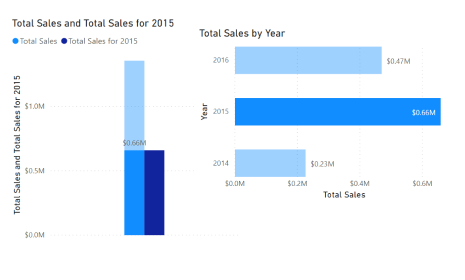

Notice how both measures are now the same amount. If we were to filter by any other criteria, including region, employee, or product, the filter context would still be applied to both measures. It's only the year filter that doesn't apply to that measure.

Let's practice using the `CALCULATE` function!

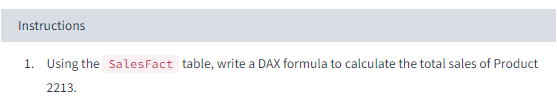

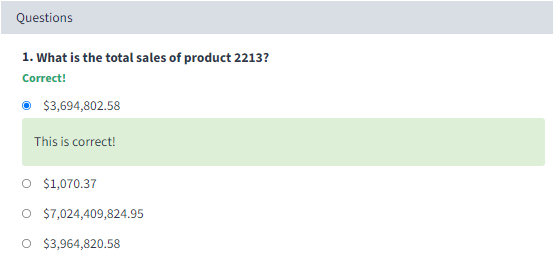

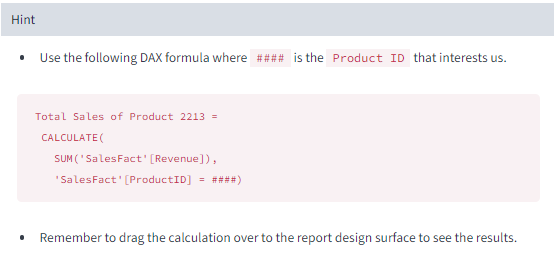

Another DAX function that allows us to override the default behavior is `USERELATIONSHIP`.

Consider the following data model example.

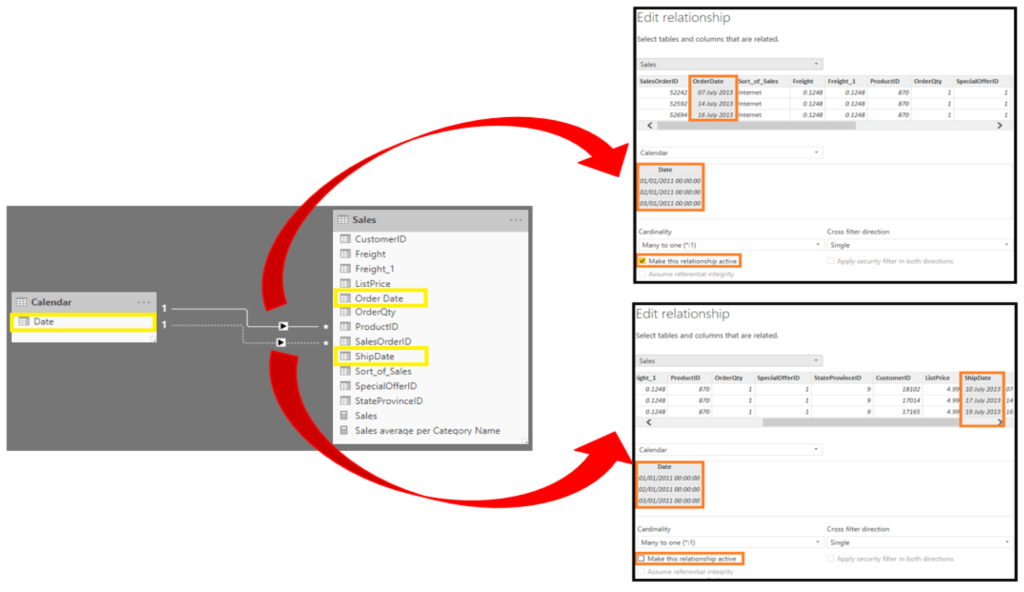

The preceding screenshot shows an established relationship between the `Date` and `OrderDate` columns, as shown by the highlighted line connecting the two. The solid line between the two tables indicates that it is the active relationship, meaning that by default, any slicing on the date table where measures in the Sales data are being displayed will be along the `OrderDate` column. A dashed relationship exists between the `Date` and `ShipDate` columns, indicating that it is an inactive relationship. This relationship will never be used unless explicitly declared in a measure.

The goal is to build the following report, where we have two visuals: 
* Sales by Ship Date and 
* Sales by Order Date.

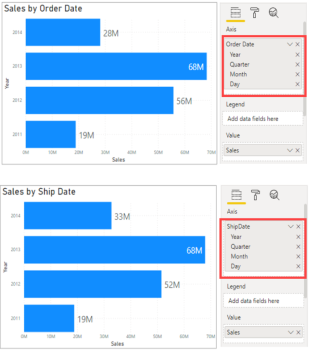

These visuals show the sales over time, but the first visual is by order date, and the second is by ship date, so even though they are both dates, a different data point is associated with them to get both sets of data on the same visual.

To create this measure for Sales by Ship Date, we can use the DAX function `USERELATIONSHIP`. This function specifies a relationship to use in a specific calculation without overriding any existing relationships. It is a beneficial feature because it allows developers to make additional calculations on inactive relationships by overriding the default active relationship between two tables in a DAX expression, as we see in the following example:

`Sales by Ship Date = 
 CALCULATE(
   SUM(Sales[TotalPrice]),
   USERELATIONSHIP(Sales[ShipDate],
                   'Calendar'[Date])
 ) `

Now, we can create the second visual.

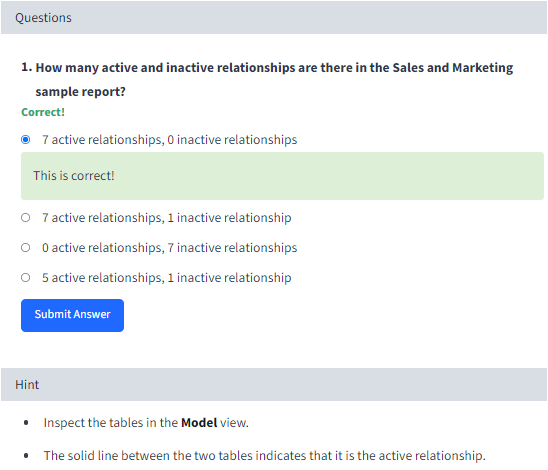

In situations when we don't want the standard evaluation behavior in Power BI, we can use the `CALCULATE` and/or `USERELATIONSHIP` functions. However, there are more circumstances when we don't want the standard behavior. One of those situations is when we have a semi-additive problem to resolve. Standard measures are simple concepts, where they might use the `SUM`, `AVERAGE`, `MIN`, and `MAX` functions. So far, we've been using `SUM` for the Total Sales measure.

Occasionally, summing a measure doesn't make sense, like when we're performing inventory counts in a warehouse. For example, if on Monday, we have 100 mountain bikes, and on Tuesday we have 125 mountain bikes, we wouldn't want to add those together to indicate that we had 225 mountain bikes between those two days. In this circumstance, if we want to know our stock levels for March, we would need to tell Power BI not to add the measure but instead take the last value for the month of March and assign it to any visual.

We can use the `CALCULATE` function to complete this action, along with the `LastDate` function, as we see in the following example:

`Last Inventory Count = 
 CALCULATE(
  SUM('Warehouse'[Inventory Count]), 
  LASTDATE('Date'[Date])
 )`

This approach will stop the `SUM` from crossing all dates. Instead, we will only use the `SUM` function on the last date of the time period, effectively creating a semi-additive measure.

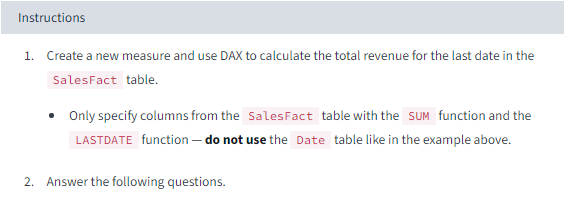

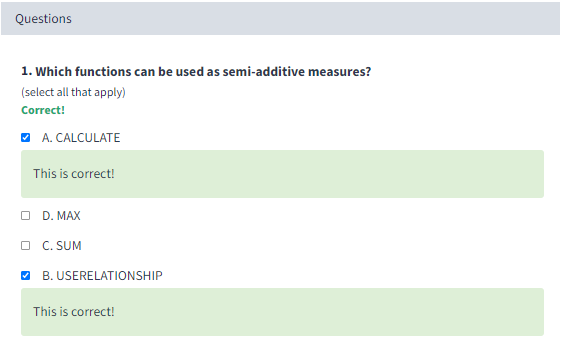

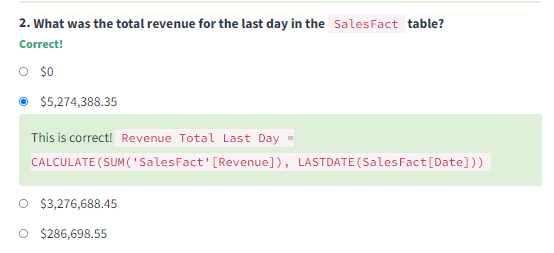

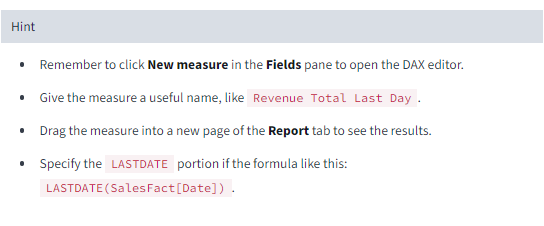

All data analysts will have to deal with time. Dates are important, so we highly recommend that we create or import a dates table. This approach will simplify date and time calculations in DAX.

While some time calculations are simple to do in DAX, others are more difficult. For instance, the following screenshot shows what happens if we want to display a running total:

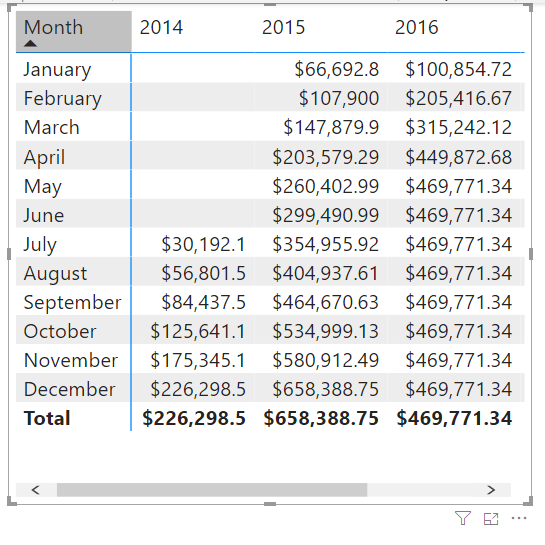

Notice that the totals increment for each month but then reset when the year changes. In other programming languages, this result can be fairly complicated, often involving several variables and looping through code. DAX makes this process fairly simple, as we see in the following example:

`YTD Total Sales = 
 TOTALYTD(
  SUM('Sales OrderDetails'[Total Price]), 
  Dates[Date]
 )`

The `YTD Total Sales` measure uses a built-in DAX function called `TOTALYTD`. This function takes an argument for the type of calculation. We can use the `SUM` function to get the `Total Price`, as we've done throughout this lesson. The second argument that you want to operate over is the `Dates` field. We can use our `Dates` table and add this measure to our visual, and we'll get the running total result that we're looking for. We can use all functions with `YTD`, `MTD`, and `QTD` in a similar fashion.

Another example of working with time would be comparing our current sales with the sales of a previous time period. For instance, if we want to see the total sales of the month next to the total sales of the prior month, we would enter the DAX measure definition, as we see in the following example:

`Total Sales Previous Month = 
 CALCULATE(
  SUM('Sales OrderDetails'[Total Price]), 
  PREVIOUSMONTH(Dates[Date])
 )`

This measure uses the `CALCULATE` function, indicating that we're overriding the context to evaluate this expression the way that we want to. We're summing Total Price, as we've been doing throughout this file. For the second argument, we're using `PREVIOUSMONTH` for the override, which tells Power BI that, no matter what month is the default, the system should override it to be the previous month.

The following screenshot shows the results in a table visual.

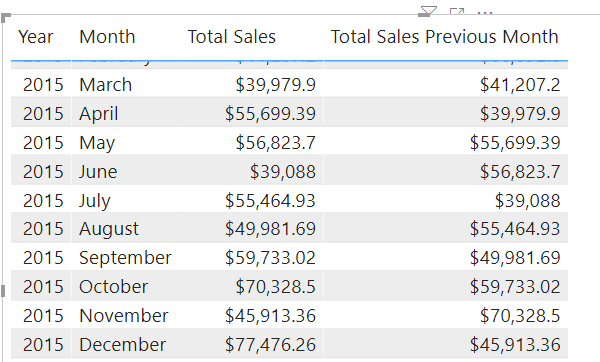

When we examine the months side-by-side, compare the total sales for July to the total sales for June.

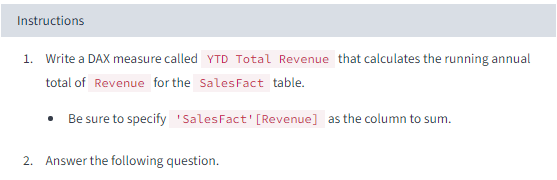

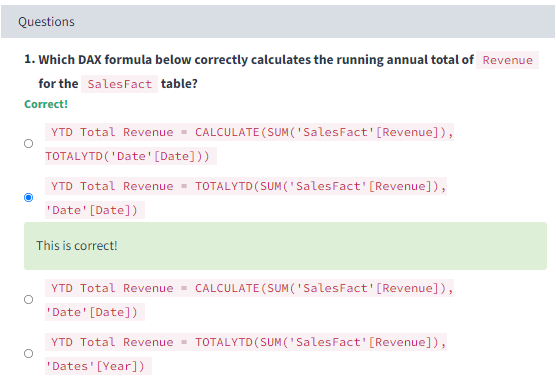

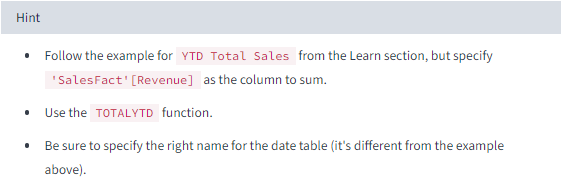

This file started on a journey to understand DAX. We learned about creating simple DAX columns and measures, how they work, and how to choose one over the other. We learned about context and how to override it with the `CALCULATE` function, and we learned about time intelligence and semi-additive measures. Mastery of DAX will take time and effort, but this file has provided us with a great start.